# **Working memory training**: Module allegiance matrix calculation

Karolina Finc | Centre for Modern Interdisciplinary Technologies, Nicolaus Copernicus University in Toruń, Poland

**Last edited:** 04-10-2018


Step 0:  Loading libraries
--------------------------------

In [2]:
import sys
sys.path.append("..")
import os

%matplotlib inline

import scipy.io as sio
import numpy as np
from nilearn import plotting 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from fctools import networks, figures

#---- matplotlib settings
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
plt.rcParams['font.family'] = 'Helvetica'

Step 1: Getting modules names and color pallete
----------------------------------------

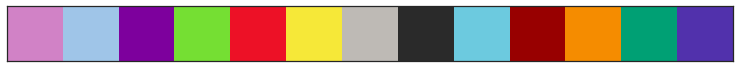

In [3]:
labels = pd.read_csv(f'../support/modules.txt', sep = " ", header = None)

power_colors_new = {'AU':'#d182c6', 
                'CER':'#9fc5e8', 
                'CO':'#7d009d', 
                'DA':'#75df33', 
                'DM':'#ed1126', 
                'FP':'#f6e838', 
                'MEM':'#bebab5', 
                'SAL':'#2a2a2a', 
                'SOM':'#6ccadf', 
                'SUB':'#980000', 
                'UNC':'#f58c00', 
                'VA':'#00a074', 
                'VIS':'#5131ac',}

modules = sorted(labels[0].values)
network_pal = (sns.color_palette(power_colors_new.values()))
sns.palplot(sns.color_palette(power_colors_new.values()))

network_lut = dict(zip(map(str, np.unique(modules)), network_pal))

network_colors = pd.Series(modules).map(network_lut)
network_colors = np.asarray(network_colors)

n_roi = len(labels)
n_net = len(np.unique(modules))

Step 2: Loading module assignment matrices
-------------------------------------------------------------------------------

In [5]:
top_dir = '/home/finc/Dropbox/Projects/LearningBrain/'
mat = sio.loadmat(f'{top_dir}data/neuroimaging/03-modularity/dynamic/02-module_assignment/power_modules.mat')

idx = np.argsort(labels[0])

module_assignment = mat['modules']
module_assignment = module_assignment[:, :, :, idx, :]

Step 3: calculating allegiance matrices
-------------------------------------------

In [8]:
# Calculating allegiance matrices (mean over optimizations)
n_sub = module_assignment.shape[0]
n_ses = module_assignment.shape[1]
n_opt = module_assignment.shape[2]
n_nod = module_assignment.shape[3]

P = np.zeros((n_sub, n_ses, n_nod, n_nod))

for i in range(n_sub):
    print(f'Subject {i+1}')
    for j in range(n_ses):
        P[i,j,:,:] = networks.allegiance_matrix_opti(module_assignment[i,j,:,:,:])

np.save(f'{top_dir}data/neuroimaging/03-modularity/dynamic/03-allegiance_matrices/allegiance_matrix_power_opt_mean.npy', P)

Subject 1


KeyboardInterrupt: 

In [14]:
# Calculating allegiance matrices for each window (mean over optimizations)

n_sub = len(module_assignment[:, 0, 0, 0, 0])
n_ses = len(module_assignment[0, :, 0, 0, 0])
n_nod = len(module_assignment[0, 0, 0, :, 0])
n_win = len(module_assignment[0, 0, 0, 0, :])

W = np.zeros((n_sub, n_ses, n_win, n_nod, n_nod))

for i in range(n_sub):
    print(f'Subject {i+1}')
    W[i,j,:,:,:] = networks.all_window_allegiance_mean(module_assignment[i, j, :, :, :])

np.save(f'{top_dir}data/neuroimaging/03-modularity/dynamic/03-allegiance_matrices/window_allegiance_matrix_power_dualnback.npy', W)

Subject 1
Subject 2
Subject 3
Subject 4
Subject 5
Subject 6
Subject 7
Subject 8
Subject 9
Subject 10
Subject 11
Subject 12
Subject 13
Subject 14
Subject 15
Subject 16
Subject 17
Subject 18
Subject 19
Subject 20
Subject 21
Subject 22
Subject 23
Subject 24
Subject 25
Subject 26
Subject 27
Subject 28
Subject 29
Subject 30
Subject 31
Subject 32
Subject 33
Subject 34
Subject 35
Subject 36
Subject 37
Subject 38
Subject 39
Subject 40
Subject 41
Subject 42
Subject 43
Subject 44
Subject 45
Subject 46
